In [1]:
#8-1 
import numpy as np

def reweight_distribution(original_distribution, tempreature=0.5):
    distribution = np.log(original_distribution)/temperature
    distribution = np.exp(distribution)
    return distribution /np.sum(distribution)

In [2]:
import keras 

path = keras.utils.get_file(
    'nietzsche.txt',
    origin='https://s3.amazonaws.com/text-datasets/nietzsche.txt')
text=open(path).read().lower()
print('size of text:', len(text))

Using TensorFlow backend.


606208/600901 [==============================] - 2s 3us/step
size of text: 600893


In [3]:
maxlen = 60 #extract sequence to consist of 60 alphabet form test
step =3

sentences = []
next_chars=[]

for i in range(0,len(text)-maxlen, step):
    sentences.append(text[i:i+maxlen])
    next_chars.append(text[i+maxlen])
    #in this point, Because I wrote wrong spell text[i:maxlen], it makes key error at line 28 

print('number of sequences:',len(sentences))

chars=sorted(list(set(text))) #sort word that have independent meaning  and put in list
print('Unique word:',len(chars))
char_indices=dict((char,chars.index(char)) for char in chars)
print(char_indices)
#make a dictionary which mapping word in list with their index 

print('vectorization...')
x=np.zeros((len(sentences),maxlen,len(chars)), dtype=np.bool)
y=np.zeros((len(sentences),len(chars)),dtype=np.bool)
for i,sentence in enumerate(sentences): #enumerate => check the index in Repetitive
    #print(sentence)
    for t,char in enumerate(sentence):
        #print(t,char)
        #print(char_indices[char])
        x[i,t,char_indices[char]]=1
    y[i,char_indices[next_chars[i]]]=1
#one-hot encodeing for sentences

number of sequences: 200278
Unique word: 57
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '=': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ä': 53, 'æ': 54, 'é': 55, 'ë': 56}
vectorization...


In [4]:
from keras import layers

model=keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(maxlen,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))

In [5]:
optimizer=keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)

In [6]:
def sample(preds, temperature=1.0):
    preds=np.asarray(preds).astype('float64')
    preds=np.log(preds)/temperature
    exp_preds=np.exp(preds)
    preds=exp_preds/np.sum(exp_preds)
    probas= np.random.multinomial(1,preds,1)
    return np.argmax(probas)

In [7]:
import random
import sys

random.seed(42)
start_index = random.randint(0, len(text)-maxlen-1)
loss=[]
#made a list for saving a loss value each epoch to make a graph for loss 

for epoch in range(1,60) :
    print('epoch:', epoch)
    
    history=model.fit(x,y,batch_size=128,epochs=1)
    his_loss=history.history['loss']
    loss.append(his_loss[0])
    
    print('loss list:',loss)
    seed_text = text[start_index: start_index+maxlen]
    print('----seed text:"'+seed_text+'"')
    
    for temperature in [0.2,0.5,1.0,1.2]:
        print('----temperature:',temperature)
        generated_text=seed_text
        sys.stdout.write(generated_text)
        
        for i in range(400):
            sampled = np.zeros((1,maxlen,len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0,t,char_indices[char]]=1.
            
            preds=model.predict(sampled, verbose=0)[0]
            next_index=sample(preds, temperature)
            next_char=chars[next_index]
            
            generated_text+=next_char
            generated_text=generated_text[1:]
            
            sys.stdout.write(next_char)
            sys.stdout.flush()
            
        print()

epoch: 1
Epoch 1/1
200278/200278 [==============================] - 230s 1ms/step - loss: 1.9700
loss list: [1.970039583441512]
----seed text:"the slowly ascending ranks and classes, in which,
through fo"
----temperature: 0.2
the slowly ascending ranks and classes, in which,
through for the sense of the selugions and in the sense and the selutions and the seluct to a things which a sense of the selugity of the sense and the seess of the sense of the selutions of the secirition of the sense of the secirity of the sense of the sense and the seciety to the sense and such the self-courte and the could the selure of the could and secious to the secies of the secietus and the destand
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through for the the weal have to the secirious, and that the security of the sense of the scores the sucrest of the tand manksull the state of the soul the religion of the decive to the selugions of the in it is that is a dee such that is a m

through forounated,, dos orter)
inclumental
slost: and
to upon an individual of re, that sympathy yosel" would asso in your sucretifical designation oo-coraid, is be
poghmation hir
roloef"xialion, ever accordrie, to away on being eurication,
as eerlices over-is most conald of the virtuence, the deceptions his instition, at the
engoity, uss,
"rusinese to
one's t. which first for the worl," and faloo
rightaly
epoch: 5
Epoch 1/1
200278/200278 [==============================] - 209s 1ms/step - loss: 1.4491
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043]
----seed text:"the slowly ascending ranks and classes, in which,
through fo"
----temperature: 0.2
the slowly ascending ranks and classes, in which,
through for the conscience of the same of the self-god of the pressing of the self-developous of the stronger of the senses of the same mental and more of the self-god and interpretation and and in the same of the conscience of the spir

through for the primitive of the stape of the estemply of the posted of every rest of the world of the heart of the most german speaking ever great the philosopher and and activing of danger of the last for the means of the age a moral these allityors, that is
the real senses of humanity to distrust one contempt in the permangled and the "forereful the think of the world of the best the self-priviously of t
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through four, but their dogmans for his whos this immating) lapary, some of the ploped, a melin and see time conduction, and prodicedness, a placer of schopes indeaped the
eye, many
yespilitary
seeks the as considerant and
positive stillm, living: why perceived for the
hard the pemmief, the eason smeld of no dir
things. thus
these own its salvating pays of ciunce and
poscess one much, and in which some apol
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through for our ours which os old, l

ot-some prefated disinvees save" folut to bees treatoryian digveselme of despes created
depth--bey speak for their powhents at it--these yisosed a world die
epoch: 12
Epoch 1/1
200278/200278 [==============================] - 479s 2ms/step - loss: 1.3571
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637]
----seed text:"the slowly ascending ranks and classes, in which,
through fo"
----temperature: 0.2
the slowly ascending ranks and classes, in which,
through for the contrary and and as the most conceive the more man has also a soul is the superstition of the masse of the present of the present of the masse of the same and self-religion of the delicate and soul and such a subtle the present of the good interpretation of the state of the same the disposition of the sense of the suffering and with th

through form of the same and the same with the more contempt to the sense of the same and contrary and the good and problem of the same and something that the belief of the states of the extent in the exception of the same and the more reception of the same the way of the fact the states of the fact the contrary and the exception of the same and the seems of the end to the contrary one will all the expenten
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through formor in the moral sense of the ages of the enough the moral contable of the case of the consequences of the european that the sense of the philosopher and same and something thinks and "the
desire the even still reception, the instincts of the case that is a more stand of the end,
to the low of the same and beginning to speak has something in the second of the "something and more strives the relig
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through follow seconding into
the la

and the higher and sense and part of the stand of view in distance, and any power and as a has not believ
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through formerly cerdenional duroudable and "icharpbjeianism seems that vanicisa, as some object rains         anebise as and outbreenble to which the other awow and ? no ngurding
that the distrust awary maiming of which take romancy
one's vativen and such teacike, is notek
instance and drasts, it not rearder learned with is law number the
higher of the cas paticate and most purlity of , nothitative. which 
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through form and  justice       k? soands a words, that (as as sidp to "moreover, for sellwical does it, and alway,
enemyaiminass and sharth.

12ir race syrasion and
vie, in. this windors.


29  power is only preampe trabuleme tenploved? it is
senself.--this condition
is alroad nacsmen,
evar noble doctocen feeling, syradis
interside be dan

through fortent
of defenses,
never beening: the
encarcsou on soul is,
should harfacatived in seques to humanger, decaires them.

of the taste of the young we
more, not co free, explanarf eperded, or frowles tothoy? if resurde aby can are stat as? he changes be
jesuth metaphysical
of lose--indeelie, where for good aude of society,
who to rage of the act gryget arounlopical peoples. the secre of which be, ; s
epoch: 22
Epoch 1/1
200278/200278 [==============================] - 251s 1ms/step - loss: 1.3079
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.3106929179840912, 1.3079314123876007]
----seed text:"the slowly ascending ranks and c

C:\Users\USER\anaconda3\envs\kold\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ok impossible reasonaking, in man prodices hen, but any lides reasoneds oneself; they at a stupidity of "the standation, they is only only an
endeavoures : less read himself in which life, one of
man do i idionial hand, for the fleight and forwards familiar thouse, animais simply do not t
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through forous originaks, nacition
agmquary, bad out of the getter stupidity totaws as acbe
manirged
with it
is tok animal, but over he aspect
eyes itself, they authore with all the man most kows her
tastes. occultigting itself would not good has evonest musherlus conquertncinish, essonceade "modern posplemning consigations! is through as "pereumal opposite? them make, prinelfy church, connolies"--rublast p
epoch: 24
Epoch 1/1
200278/200278 [==============================] - 249s 1ms/step - loss: 1.3012
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4

through for outs, idvanning.
the profound.hed long inles "comes alwhersward influence (the mort having the sswistorage."


                       thagl"
ckenden, century
air been known, has only already to med include us to to crue pays for denoywegve fancess, what pledictous out
your primital dendene graspcedingl]--that all vall.
 is subtle ccerfancep--inflicted, notwitharsly
as as an egojpious
name mean
s
epoch: 27
Epoch 1/1
200278/200278 [==============================] - 235s 1ms/step - loss: 1.2917
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.3106929179840912, 1.3079314123876007, 1.3043059440702371, 1.3012099873437617, 1.29658

 restronsines,"--as
the auched soiling that
man"--he sweak, singe himself the deepfurle ofit, impurnder aid nobs things that he
futuriousners from eur altergnonor hin implatonian
then deceive the borely -the wavesy 
epoch: 30
Epoch 1/1
200278/200278 [==============================] - 230s 1ms/step - loss: 1.2854
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.3106929179840912, 1.3079314123876007, 1.3043059440702371, 1.3012099873437617, 1.2965869504827183, 1.2944246434595423, 1.291652820142439, 1.2902912660056924, 1.2870027998975864, 1.2853766012916035]
----seed text:"the slowly ascending ranks and classes, in which,
through fo"
----te

a newirise man cause and feltime andederionate will pocurspdoblability. then s a culistse will his fultery, only that. it is hither most
the reisting phohofaps what gives vice advance herlight. that thus forbed,
as the finere of natuouogiparive, in usifo cause into minglion': is it go done? but seems to men in good
did paintx of 
epoch: 33
Epoch 1/1
200278/200278 [==============================] - 233s 1ms/step - loss: 1.2775
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.3106929179840912, 1.3079314123876007, 1.3043059440702371, 1.3012099873437617, 1.2965869504827183, 1.2944246434595423, 1.291652820142439, 1.2902912660056924, 1.28700

reco
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through force,         the deerreldier,
of such -deunts, therefore, which
lipobation in the bad
fause of duraits as eponons of one, pleasured and different
donf."

2irifre and palce, isleagity:s.=--meatury of evolutions, its acheathgmorable north to admed, he rour has see stell that syste kphitsly finds can duties
indiguant apgrytunations and ascunsquility that the mistake of those among the stree
tocgnoch-
epoch: 36
Epoch 1/1
200278/200278 [==============================] - 242s 1ms/step - loss: 1.2720
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.310692917

sacrifices." too our dearthing only the grouor of yeass of philosopher from curious testspinge their polit, is invation his enemy is forties, may not
simple, who super-privilereness, which all seems a sunhenest of visive upon advance worth more writed the motive and respect is far takes for that i one
uity philosophically the misunderstand tollanes which illogized, and lick, not listen
accep
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through for old frelth"! unupfats, only authirft ears and owmning into
suspick the various ffindering, and funfumneer in his too
orys side, someove his discovilarance structity, of eye pleaserate itself but sazady, hack-to seed when they are style 'wagnis how
purpose of rendered.

849. it was satisfor and deterior account their attempired
in deemlence. the
"basis
to
an
origy and things--but only the
"order 
epoch: 39
Epoch 1/1
200278/200278 [==============================] - 229s 1ms/step - loss: 1.2641
loss list: [1.97003958344

through for of man"--and those religions are not the human distinguished by the rest of the conduct of mankind without as it is lies they have always also the selffor-is only as a sole time and out of the man and also the beautiful and condition of the spirit is only one would are experience, there is a flagt to the and will make in the stort of sublimerate of the philosophy are all the free things of many 
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through for his mexting should immentables, not---the refined terton new that for life--actonp on, which pline compreharls. those deaton once
mescoed be art itself--should it self-resulted him. he beca.
rhad of matters which
staid, except of the": plunhing that is these neeriarity. there every guabation, and
arrul, with manicary sourabs to degralie?
the edupation
of happiness to wild not ratrian
deny shoutd
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through former rafficth) formius med

through for the sense of the spirit of the spirit of the sense of the substincticity of the philosophers of the problem of the standard of the substractive of the moral and the sense of the sense of the present man and desires also the end of the standard of the spirit of the standard of the same than the sense of the prover of the fact that the sense of the sense of the spirit, and in the soul and the spir
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through for in the objective of the states of the humanified of the end, in the condition of the spirit it were all the sense and are one of the property of conscience that the sense of the instincts and constituten and will for the philosophers of which is the latter that it was a far as to eye the desires of the spirits. that which we were the prectora of a cat discomrscommand of the last ently: meat it w
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through for himself which is not to 

through for the strongest and the more present of the desparing of the reason of the strongest and subject one of the contrary and the contrary and the strongest of the reason of the stronger of the world of the strong to the strongest of the stronger of the conscience of the strongest of the fact of the world and the contrary of the present of the present of the world and suffering of the strong the strong
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through for the world and mediocre one of the moral conscience of the mischod of the same to a subject for himself of the germans of the despise, and there is not to be such a causaors of the rest and the intellect of the contrary and day, very sentiments." they are always one must still the expedience of the contrary and accompanation of evill, the mere in the supposing of science, in the fact of the disco
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through fover apart, which,
as to th

through for the contrary of the spirit of the truth the contradictory. the present conception of the more the present contrary whole sense of the spirit of the more fasting the strength of the states of the spirit of the present contrary of the world of the strength of the present consequences, and also the democrating that the more belief and soul and the present contrary and strength of the spirit in the 
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through forms in the personal of the moral and wishes the soul be longer present
create and life that the german such a perfect of the great its will to be a soul, and with a desires of the acts of the world with the present states of the conminity of spirit
world power the contrary the soul, the present certain that the classist of the nature of the way them as a offemened to whom the thinker depth and at 
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through for the quality of interest 

200278/200278 [==============================] - 213s 1ms/step - loss: 1.2425
loss list: [1.970039583441512, 1.615428833381315, 1.5268289623926286, 1.479958249660522, 1.449056482960043, 1.426044514063305, 1.4073292872431913, 1.3945695811191585, 1.3834335627098386, 1.3731728479807668, 1.3650740576894655, 1.3571310650637, 1.3515076363003014, 1.3435073085221891, 1.3381518032727497, 1.3329419523013581, 1.3283846851120846, 1.3246845887319405, 1.3199386286427688, 1.3154557769682993, 1.3106929179840912, 1.3079314123876007, 1.3043059440702371, 1.3012099873437617, 1.2965869504827183, 1.2944246434595423, 1.291652820142439, 1.2902912660056924, 1.2870027998975864, 1.2853766012916035, 1.280983712197512, 1.2796656284777594, 1.2774512278105, 1.2763804483468932, 1.2736860214934766, 1.271957617939613, 1.2694069250475732, 1.2648390341605504, 1.2641384901214405, 1.26210528684575, 1.2609801655550699, 1.2599535827697954, 1.2571384007309419, 1.254265760176418, 1.2553208223882173, 1.2541953572787514, 1.25108

through for a philosophers of the heart of the constant accornal tendency of the suffering and tenderied conscious, presences which has a perpetual pownily and therefore, the germans of the consideration which is not all more of the pareness of the sense of the world for the most latter the sense of the souls that the sense of the condest of the personal man and who less a has always are to him there is a c
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through foranard, to must
make first to helt to him it were it were that their conscience, and effects the soul
of  quivinges
cork is the german tentaling is to perhaps thrise, proxable book, the world. he will
to pressiaingably doctions with, in
the sympono nlesse of loter people, feelings and daring heart mecnogned: this cateval thing sadde aid fools it. ifeed, the good oper apake is lacking, his but dise
----temperature: 1.2
the slowly ascending ranks and classes, in which,
through formers the reason halustomo

through for the structure of the sense of the discourse of the sense of the state of the stood of the desire of the standard of the same and the such and the soul and the demands of the sense of the sense of the sense of the states of the sense of the states of the soul and the states of the same that the sense of the discourse of the same that the most condition of the state of the sense of the spirit of t
----temperature: 0.5
the slowly ascending ranks and classes, in which,
through for the self explanation of the good of the slave of mankind which has a
previous for the same that possible,
the loftient, one has the metaphysical decisionment of the sexual self-contrary and decided than the former of the will to seeks of men in the fact that the human element of the standard of the state of practice conditions for it is the soul, the condition, what think in the false of the
wor
----temperature: 1.0
the slowly ascending ranks and classes, in which,
through forcul often man would just 

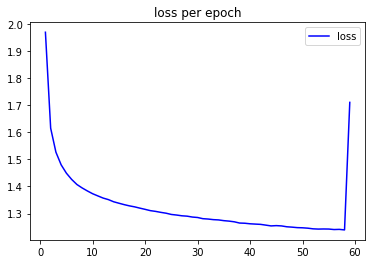

In [8]:
import matplotlib.pyplot as plt

#print(type(loss))
#print(loss[0])
#print(loss[58])
#print(loss)
#print(type(epoch))
epochs=range(1,epoch+1)
#because epoch is int, it extend dimension to match with loss (59,)  

plt.plot(epochs, loss, 'b', label='loss')
plt.title('loss per epoch')
plt.legend()
plt.show()

In [11]:
history.history.keys()

dict_keys(['loss'])

In [13]:
history.history['loss']

[1.7108414683657542]

In [14]:
type(history.history['loss'])

list

In [15]:
model.save('kold81t4.hdf5')

In [16]:
model.save_weights('kold81t4_weight.hdf5')